# HOUSE PRICE PREDICTION

In [2]:
import pandas as pd
data =pd.read_csv("home_data.csv")
data.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


## MODEL1(sqft_living)

(21613, 21)

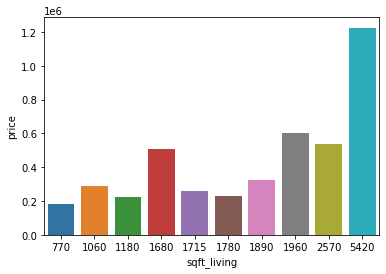

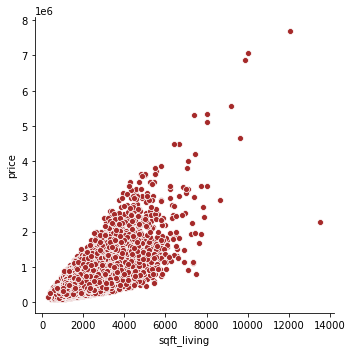

In [3]:
import seaborn as sns
sns.barplot(x='sqft_living',y='price',data=data.head(10))
sns.relplot(data=data,x='sqft_living',y='price',color='brown')
data.shape

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=data.iloc[:,5:6]
y=data.loc[:,'price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=430)

model1=LinearRegression()
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
prediction1

array([451858.47281734, 484421.46761591, 573969.70331197, ...,
       240199.00662665, 561215.86368253, 663517.93900804])

In [10]:
import numpy as np

#RSS_train
print ( 'Residual sum of squares train: %.2f' % np.mean((model1.predict(X_train) - y_train) ** 2))

print ('R-squared:', model1.score(X_train, y_train))
#RSS_test
print ( 'Residual sum of squares test: %.2f' % np.mean((model1.predict(X_test) - y_test) ** 2))

print ('R-squared:', model1.score(X_test, y_test))

Residual sum of squares train: 64482520559.06
R-squared: 0.48732360274516595
Residual sum of squares test: 84196692818.81
R-squared: 0.5063394446414332


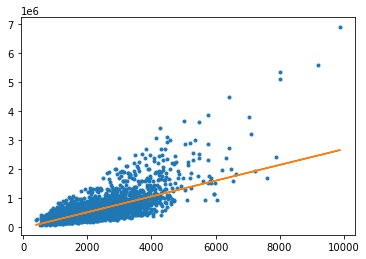

In [11]:
import matplotlib.pyplot as plt
plt.plot(X_test,y_test,'.',X_test,prediction1,'-')

## Model2(max features)

In [26]:
X2=data.iloc[:,[3,4,5,6,7,10,11,12,-1,-2]]
y=data.loc[:,'price']

X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=430)

model2=LinearRegression()
model2.fit(X2_train,y_train)
prediction2=model2.predict(X2_test)
prediction2

array([446374.74990718, 382114.01686167, 573944.44686276, ...,
       228758.51183349, 439792.14205502, 704580.41778633])

In [27]:
#RSS_train
print ( 'Residual sum of squares train: %.2f' % np.mean((model2.predict(X2_train) - y_train) ** 2))

print ('R-squared:', model2.score(X2_train, y_train))
#RSS_test
print ( 'Residual sum of squares test: %.2f' % np.mean((model2.predict(X2_test) - y_test) ** 2))

print ('R-squared:', model2.score(X2_test, y_test))

Residual sum of squares train: 57199659727.65
R-squared: 0.5452269046071536
Residual sum of squares test: 75705348543.11
R-squared: 0.5561257437292653


## From this we can observe thath model2 is better than model1 

### ------------------